In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import sklearn
import pandas as pd
sns.reset_orig()

In [2]:
# raw data
df_athletes_raw = pd.read_csv("input/powerlifting-database/openpowerlifting.csv")
df_meets_raw = pd.read_csv("input/powerlifting-database/meets.csv")

df_athletes_male = df_athletes_raw.loc[df_athletes_raw['Sex'] == 'M']
df_athletes_fema = df_athletes_raw.loc[df_athletes_raw['Sex'] == 'F']

df_relative_str = df_athletes_raw['TotalKg'] / df_athletes_raw['BodyweightKg']
df_athletes_raw['Relativestr'] = df_relative_str

In [3]:
df_athletes_raw.head()

,MeetID,Name,Sex,Equipment,Age,Division,BodyweightKg,WeightClassKg,Squat4Kg,BestSquatKg,Bench4Kg,BestBenchKg,Deadlift4Kg,BestDeadliftKg,TotalKg,Place,Wilks,Relativestr
0,0,Angie Belk Terry,F,Wraps,47.0,Mst 45-49,59.60,60,NaN,47.63,NaN,20.41,NaN,70.31,138.35,1,155.05,2.321309
1,0,Dawn Bogart,F,Single-ply,42.0,Mst 40-44,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38,6.860708
2,0,Dawn Bogart,F,Single-ply,42.0,Open Senior,58.51,60,NaN,142.88,NaN,95.25,NaN,163.29,401.42,1,456.38,6.860708
3,0,Dawn Bogart,F,Raw,42.0,Open Senior,58.51,60,NaN,NaN,NaN,95.25,NaN,NaN,95.25,1,108.29,1.627927
4,0,Destiny Dula,F,Raw,18.0,Teen 18-19,63.68,67.5,NaN,NaN,NaN,31.75,NaN,90.72,122.47,1,130.47,1.923210


In [4]:
df_meets_raw.head()

,MeetID,MeetPath,Federation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,0,365strong/1601,365Strong,2016-10-29,USA,NC,Charlotte,2016 Junior & Senior National Powerlifting Cha...
1,1,365strong/1602,365Strong,2016-11-19,USA,MO,Ozark,Thanksgiving Powerlifting Classic
2,2,365strong/1603,365Strong,2016-07-09,USA,NC,Charlotte,Charlotte Europa Games
3,3,365strong/1604,365Strong,2016-06-11,USA,SC,Rock Hill,Carolina Cup Push Pull Challenge
4,4,365strong/1605,365Strong,2016-04-10,USA,SC,Rock Hill,Eastern USA Challenge


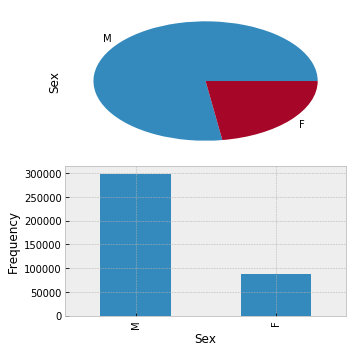

In [5]:
# Male to female ratio?
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
df_athletes_raw['Sex'].value_counts().plot.pie(ax=axes[0])

df_athletes_raw['Sex'].value_counts().plot.bar(ax=axes[1])
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Frequency")

fig.tight_layout()
plt.show()

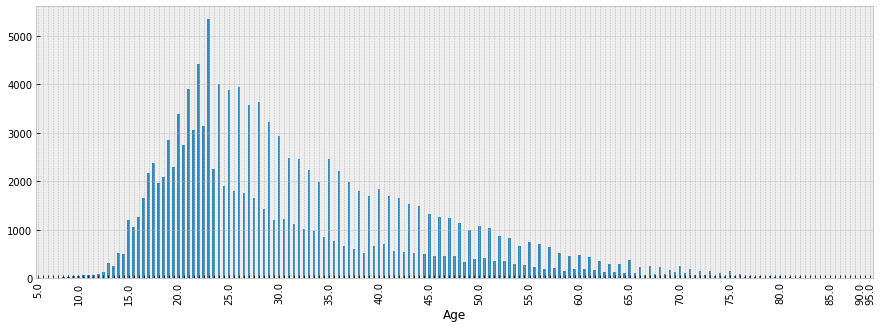

In [42]:
# Age distribution?
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
df_athletes_raw.groupby(['Age']).size().plot.bar(ax=ax)

# Stop x labels from overlapping
for label in ax.get_xticklabels():
    if float(label.get_text()) % 5 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.show()

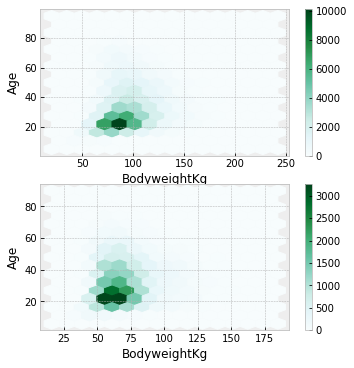

In [7]:
# Age vs Bodyweight distribution?
# Filter NaNs
fig, axes = plt.subplots(2, 1, figsize=(5, 5))
fig.tight_layout()

df_bodyweight = df_athletes_raw.dropna(subset=['BodyweightKg'])
ax = df_athletes_male.plot.hexbin(x='BodyweightKg', y='Age',gridsize=15, ax=axes[0])

df_athletes_fema.plot.hexbin(x='BodyweightKg', y='Age',gridsize=15, ax=axes[1])
plt.show()

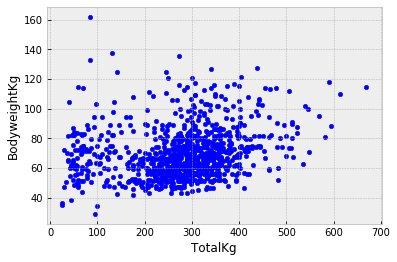

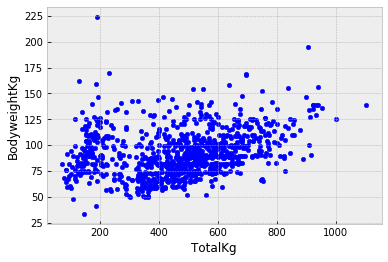

In [8]:
# How about Body vs Lift
df_body_lift = df_athletes_raw.dropna(subset=['TotalKg','BodyweightKg'])
df_athletes_fema.sample(1000).plot.scatter(x='TotalKg', y='BodyweightKg')
df_athletes_male.sample(1000).plot.scatter(x='TotalKg', y='BodyweightKg')
plt.show()

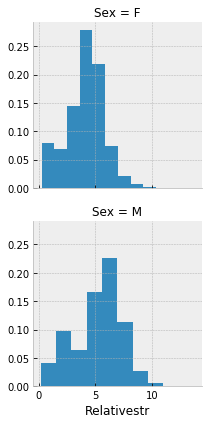

In [9]:
# Number of times body weight lift
df_relative_str = df_athletes_raw.dropna(subset=['TotalKg','BodyweightKg'])
g = sns.FacetGrid(df_relative_str, row='Sex')
# Normalised histogram
g.map(plt.hist, "Relativestr", density=True)
plt.show()

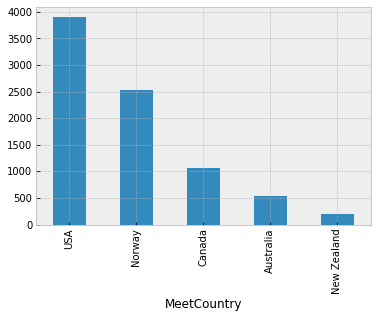

In [43]:
# The database is biased towards USA
df_meets_raw.groupby(['MeetCountry']).size().sort_values(ascending=False).head(5).plot.bar()
plt.show()

ethu_count = df_meets_raw.groupby(['MeetCountry']).size().sort_values(ascending=False).head(5).index

In [ ]:
# Strongest Nation?
# Join databases
df_joined_raw = df_meets_raw.set_index("MeetID").join(df_athletes_raw.set_index("MeetID"), lsuffix="_athletes", rsuffix="_meets")

# Missing data?
sns.heatmap(df_joined_raw.isnull(), cbar=False)

In [ ]:
df_joined_raw.groupby("MeetCountry").size().sort_values(ascending=False).head(5).plot.bar()
plt.show()

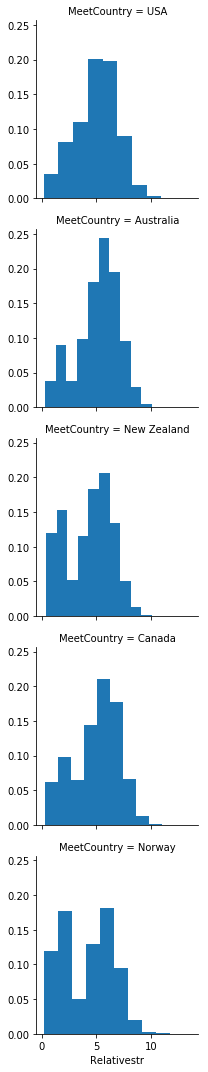

In [105]:
df_country = df_joined_raw[df_joined_raw['MeetCountry'].isin(list(ethu_count))]
g_str_country = sns.FacetGrid(df_country, row='MeetCountry')
g_str_country.map(plt.hist, "Relativestr", density=True)
plt.show()